# Studienbrief 1, Mathematical FOundations

In [1]:
sample(1:6, 1)

[1] 3

In [2]:
sample(1:6, 10, replace = T)

[1] 2 6 4 5 5 6 1 4 6 2

In [3]:
help(replicate)

In [4]:
dice10 <- function() {
    sample(1:6, 10, replace=T)
}

In [5]:
m <- replicate(5,dice10())

In [6]:
m

2,6,1,3,4
5,3,6,5,6
4,3,1,4,5
2,2,5,6,6
2,2,6,3,5
4,6,5,3,3
1,5,2,6,2
3,5,1,4,4
3,3,3,4,5
2,5,6,5,5


In [7]:
dice10()

[1] 4 2 5 2 3 1 5 3 2 3

## Münzwurf 

In [8]:
wuerfe <- as.factor(c('K', 'Z'))

In [9]:
sample(wuerfe, 3, replace=T)

[1] K Z K
Levels: K Z

## Kontrollaufgabe 1.1 

(a)

In [10]:
muenz10 <- function() {
    sample(as.factor(c('K', 'Z')), 10, replace=T)
}

(b)

In [11]:
anzZ <- apply(replicate(100000,muenz10()), 2, function(x){sum(x=='Z')})

In [12]:
sum(anzZ == 5)

[1] 24560

(c)

In [13]:
table(anzZ)

anzZ
    0     1     2     3     4     5     6     7     8     9    10 
  107   998  4256 11717 20415 24560 20845 11598  4447   955   102 

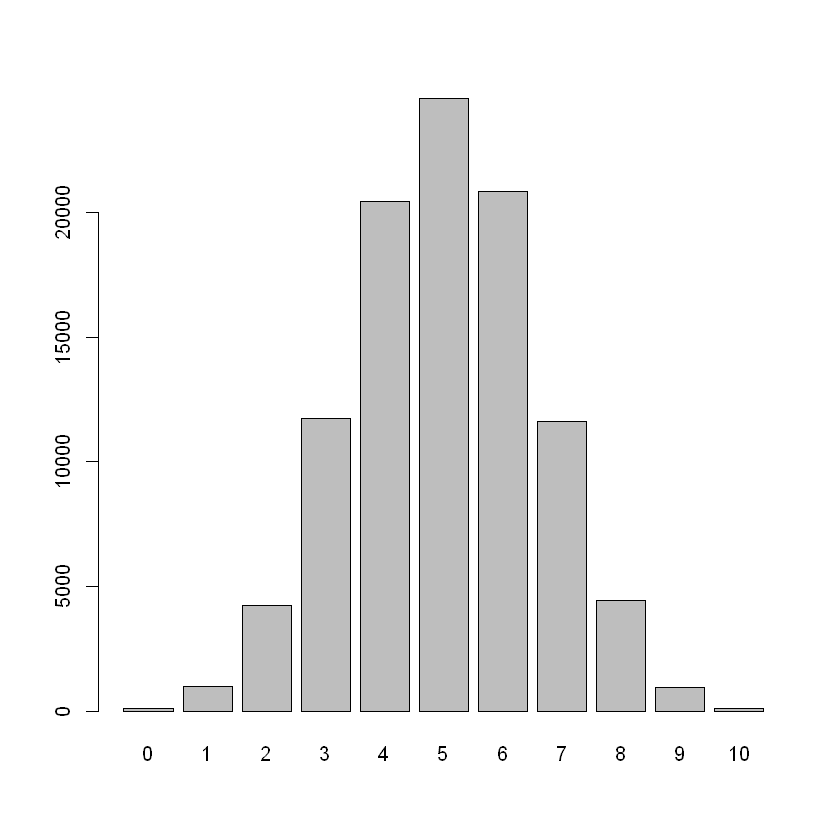

In [14]:
barplot(table(anzZ))

### Kontrollaufgabe 1.4

(c)

Wir wiederholen den zweimaligen WÜrfelwurf also 1000 mal: 

In [15]:
wuerfe <- replicate(1000, sample(1:6, 2, replace=T))

In [16]:
wuerfe

1,3,1,6,1,5,6,4,4,3,...,3,4,1,4,1,6,3,6,6,5
5,6,2,4,5,3,2,3,3,5,...,6,2,1,3,1,6,6,4,1,6


In [17]:
A <- apply(wuerfe, 2, function(x)x[1]==2)
B <- apply(wuerfe, 2, function(x)x[2]%%2==0)

In [18]:
sum(A | B)

[1] 581

Die Schätzung für die gesuchte Wahrscheinlichkeit wäre also: 

In [19]:
sum(A|B) / 1000

[1] 0.581

Der exakte Wert für die Wahrscheinlichkeit: 

In [20]:
21/36

[1] 0.5833333

(d)

obiger Code als Funktion: 

In [21]:
schaetzung <- function(){
    wuerfe <- replicate(1000, sample(1:6, 2, replace=T))
    A <- apply(wuerfe, 2, function(x)x[1]==2)
    B <- apply(wuerfe, 2, function(x)x[2]%%2==0)
    sum(A|B) / 1000
}

... die wir dann beispielsweise 1000 - mal ausführen können: 

In [22]:
schaetzungen <- replicate(1000, schaetzung())

... um dann davon einen Barplot zu zeichnen: 

In [23]:
help(hist)

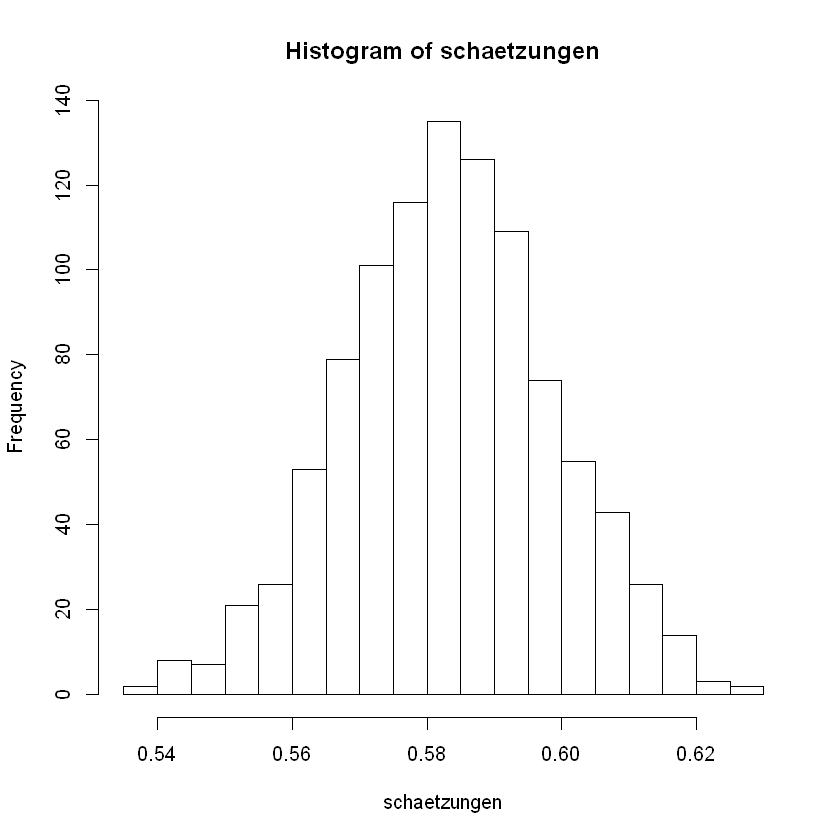

In [24]:
hist(schaetzungen, breaks=20)

In [25]:
prop.test(x=c(200, 180), n=c(240, 240), alternative="greater")


	2-sample test for equality of proportions with continuity correction

data:  c(200, 180) out of c(240, 240)
X-squared = 4.56, df = 1, p-value = 0.01636
alternative hypothesis: greater
95 percent confidence interval:
 0.01850849 1.00000000
sample estimates:
   prop 1    prop 2 
0.8333333 0.7500000 


In [26]:
prop.test(x=c(200,180), n=c(10000, 10000), alternative="greater")


	2-sample test for equality of proportions with continuity correction

data:  c(200, 180) out of c(10000, 10000)
X-squared = 0.9684, df = 1, p-value = 0.1625
alternative hypothesis: greater
95 percent confidence interval:
 -0.001275718  1.000000000
sample estimates:
prop 1 prop 2 
 0.020  0.018 


## Kontrollaufgabe

In [27]:
wuerfe1 <- apply(replicate(10**3, sample(1:6, 3, replace=T)), 2, sum)

In [28]:
tbl1 <- table(wuerfe1)

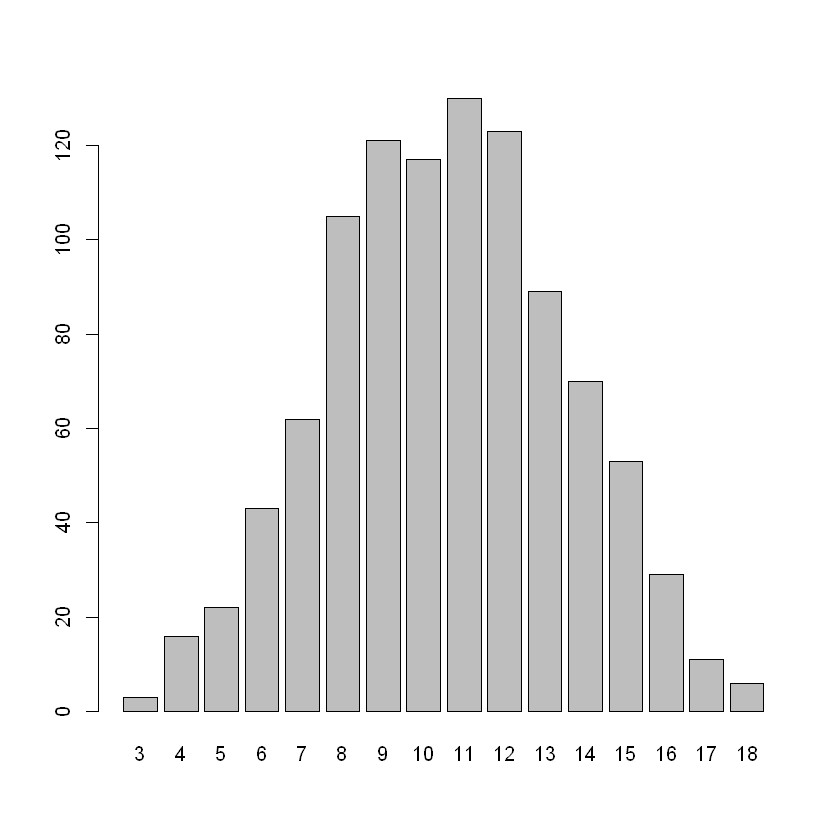

In [29]:
barplot(tbl1)

## Kontrollaufgabe

Verwenden sie \RLang, um die Verteilung der im vorigen Abschnitt
beschriebenen Zufallsvariablen zu zeichnen. Verwenden Sie dazu einen
`barplot`. 

Zunächst müssen wir die Summe aller Würfelwürfe berechnen.sapply(1:6, function(i)replicate(36,i))

In [30]:
wurf <- 1:6
combi(1:6, 2)

ERROR: Error in combi(1:6, 2): konnte Funktion "combi" nicht finden


In [ ]:
sapply(1:6, function(x)x+2)

In [ ]:
fst <- sapply(1:6, function(i)replicate(36,i))

In [ ]:
snd <- replicate(6,sapply(1:6, function(i)replicate(6,i)))

In [ ]:
thd <- replicate(36, 1:6)

In [ ]:
combinations <- t(matrix(c(fst,snd,thd), ncol=3))

In [ ]:
tbl <- table(apply(combinations, 2, sum)) / (6*6*6)

In [ ]:
barplot(tbl)

... oder beie in eines: 

In [ ]:
barplot(tbl1, col="blue")
par(new=T)
barplot(tbl, col="yellow", yaxt="n")

Die Verteilungsfunktion kann man folgendermaßen zeichnen: 

In [ ]:
cumsum(c(2,3,5,6))

In [ ]:
plot(cumsum(tbl), type="l", lwd=3, col="blue")

In [ ]:
combn(1:6, 3)

## Simulation von Würfel-Würfel vs. Erwartungswert

In [ ]:
wuerfe <- sample(1:6, 100000, replace=T)
mean(wuerfe)

## Simulation von Würfel-Würfen vs. Varianz

In [ ]:
wuerfe <- sample(1:6, 100000, replace=T)
m <- mean(wuerfe)
abw <- (wuerfe - m)**2
mean(abw)

In [ ]:
var(wuerfe)

In [ ]:
35/12

## Median

In [ ]:
median(c(4,10,3,8,5))

In [ ]:
    median(c(5,10,3,8,2,1))

In [ ]:
x <- sample(1:100, 1000, replace=T)
x <- c(x,100000, 200000)

In [ ]:
mean(x)

In [ ]:
median(x)

## Kontrollaufgabe zu mean und median des state.x77-Datensatzes

In [ ]:
head(state.x77)

### Untersuchung der Lage der Population

Zunächst die grobe Betrachtung: 

In [ ]:
pop <- state.x77[,1]

In [31]:
summary(pop)

ERROR: Error in summary(pop): Objekt 'pop' nicht gefunden


Es gilt also: 


In [32]:
mean(pop)

ERROR: Error in mean(pop): Objekt 'pop' nicht gefunden


In [33]:
median(pop)

ERROR: Error in median(pop): Objekt 'pop' nicht gefunden


In [34]:
mean(pop, trim=0.1)

ERROR: Error in mean(pop, trim = 0.1): Objekt 'pop' nicht gefunden


In [35]:
boxplot(pop)

ERROR: Error in boxplot(pop): Objekt 'pop' nicht gefunden


## Das gleich für die Illiteracy Rate

In [36]:
illit <- state.x77[,3]

In [37]:
mean(illit)

[1] 1.17

In [38]:
median(illit)

[1] 0.95

In [39]:
mean(illit, trim=0.1)

[1] 1.0975

In [40]:
help(mean)

In [41]:
weighted.mean(illit, pop)

ERROR: Error in weighted.mean.default(illit, pop): Objekt 'pop' nicht gefunden


## Streumaße

Am Beispiel des Datensatzes `illiteracy`

In [42]:
illit <- state.x77[,3]

In [43]:
var(illit)

[1] 0.3715306

In [44]:
mean((illit - m)**2)

[1] 9.769

In [45]:
m <- mean(illit)
sum((illit-m)**2)/(length(illit)-1)

[1] 0.3715306

In [46]:
sd(illit)

[1] 0.6095331

In [47]:
sqrt(sum((illit-m)**2)/(length(illit)-1))

[1] 0.6095331

Durchschnittliche Absolutabweichung

In [48]:
mean(abs(illit-m))

[1] 0.5108

In [49]:
help(mad)

In [50]:
mad(illit)

[1] 0.51891

## Untersuchung mit Hilfe von Perzentilen:

In [51]:
c(min(illit), max(illit))

[1] 0.5 2.8

In [52]:
help(quantile)

In [53]:
quantile(illit, probs=c(0.1,0.9))

10%  90% 
0.60 2.11

In [54]:
quantile(illit, probs=c(0, 0.1,0.5, 0.9, 1))

0%  10%  50%  90% 100% 
0.50 0.60 0.95 2.11 2.80

Der Interquartilsabstand: 

In [55]:
w <- c(5,1,2,10,8,15,24,11,16)
IQR(w)

[1] 10

In [56]:
sort(w)

[1]  1  2  5  8 10 11 15 16 24

In [57]:
quantile(w, c(0.25,0.75))

25% 75% 
  5  15

In [58]:
help(quantile)

## Histogramme

In [59]:
head(ChickWeight)

weight,Time,Chick,Diet
42,0,1,1
51,2,1,1
59,4,1,1
64,6,1,1
76,8,1,1
93,10,1,1


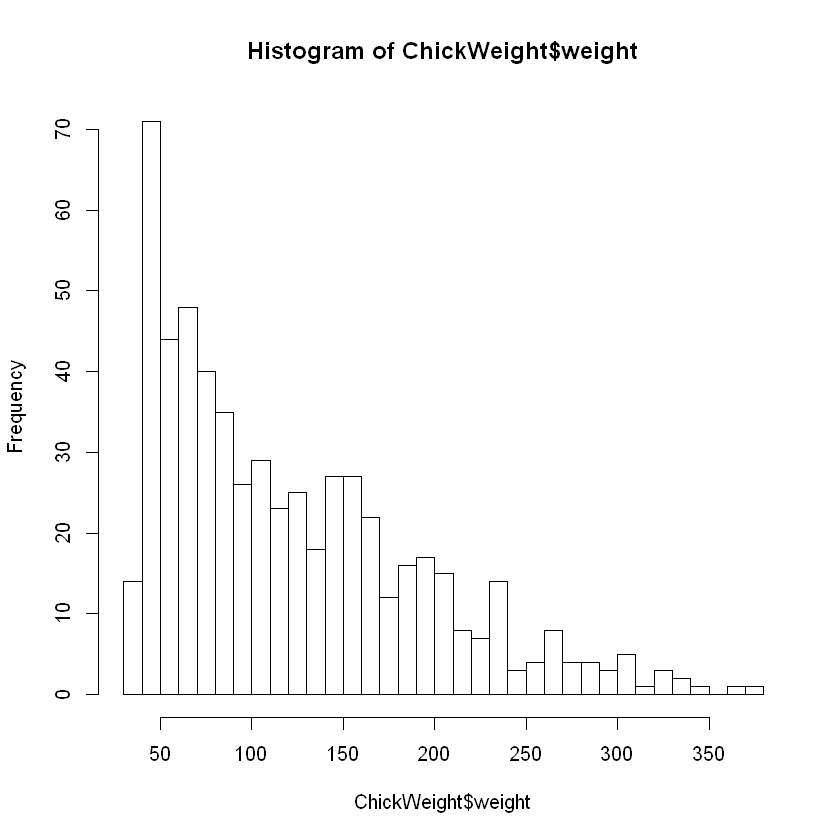

In [60]:
hist(ChickWeight$weight, breaks = 25)

In [61]:
help(density)

## Dichteschätzer

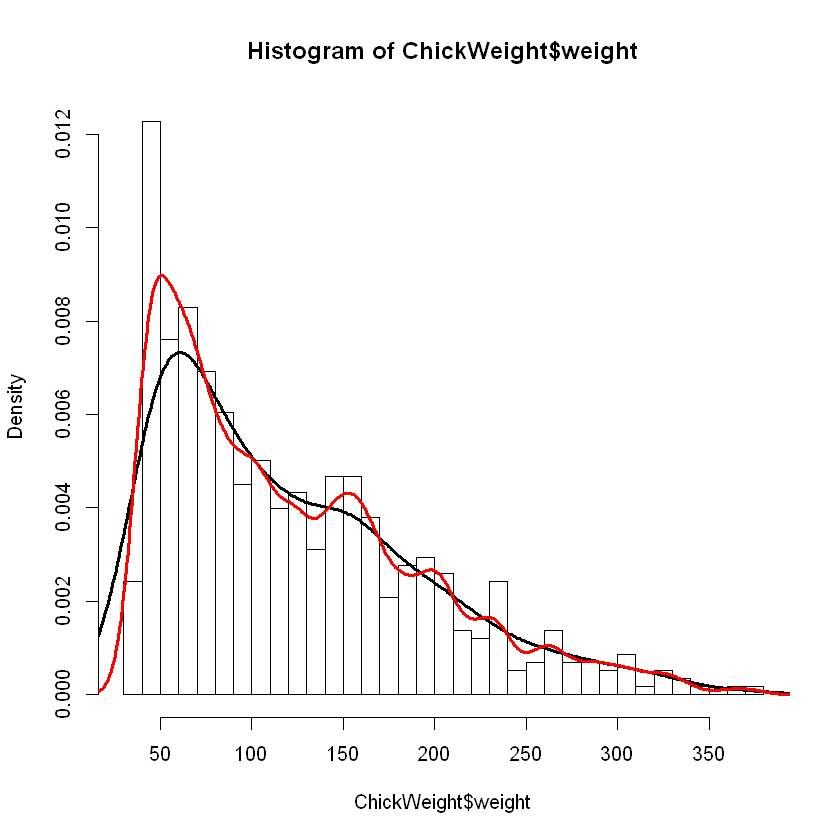

In [62]:
hist(ChickWeight$weight, breaks = 25, prob=T)
lines(density(ChickWeight$weight), lwd=3)
lines(density(ChickWeight$weight, bw="SJ"), col="red", lwd=3)

## Darstellung kategorialer Daten

In [63]:
pg <- tapply(PlantGrowth$weight, as.factor(PlantGrowth$group), median)

In [64]:
pg

ERROR while rich displaying an object: Error in dn[[2L]]: Indizierung außerhalb der Grenzen

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_generic(html_escape_names(obj), "%s. %s\n", "%s\n:   %s", 
 .     "**%s:** %s", "%s\n\n", item_uses_numbers = TRUE, escape_fun = html_escape)
10. html_escape_names(obj)
11. .escape_names(obj, "html")
12. colnames(obj)
ERROR while rich displaying a

ctrl  trt1  trt2 
5.155 4.550 5.435

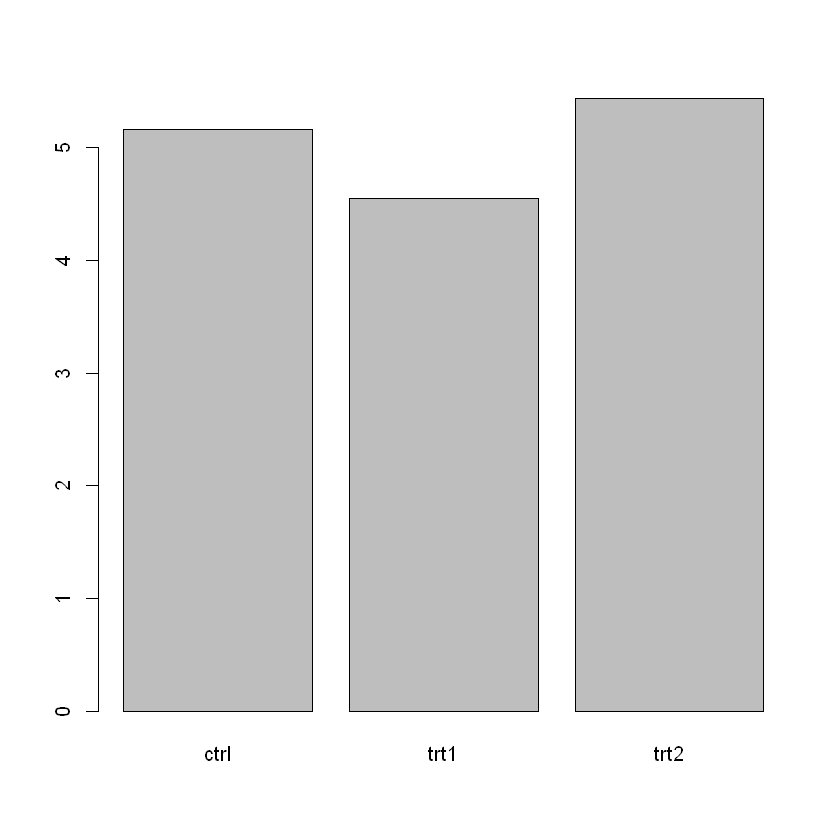

In [65]:
barplot(pg)

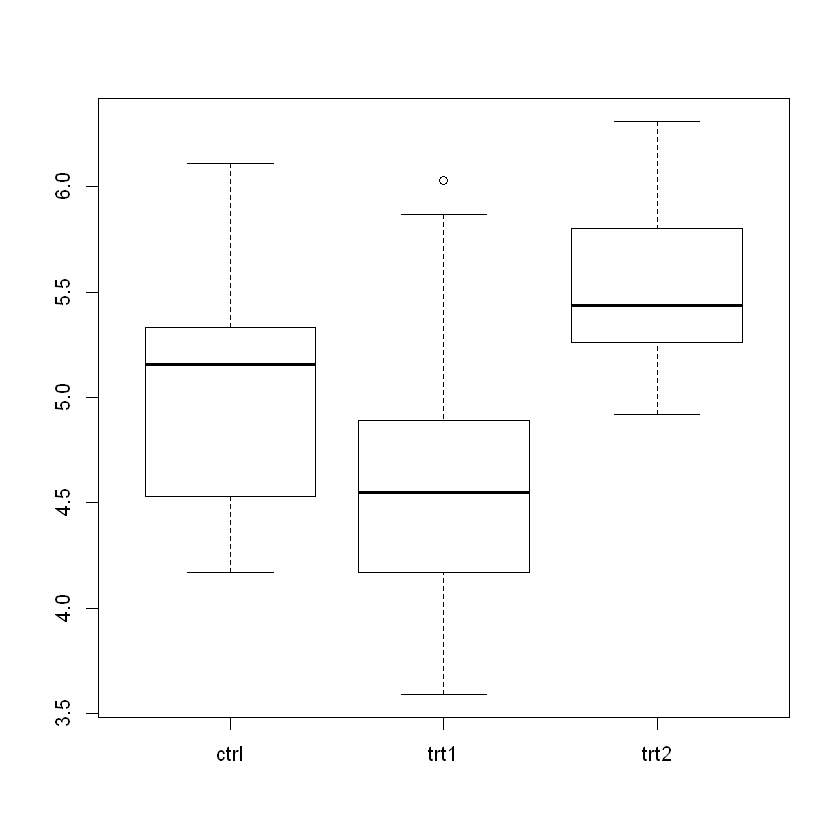

In [66]:
boxplot(weight ~ group, data=PlantGrowth)

In [67]:
help(sample)

In [68]:
library(ggplot2)

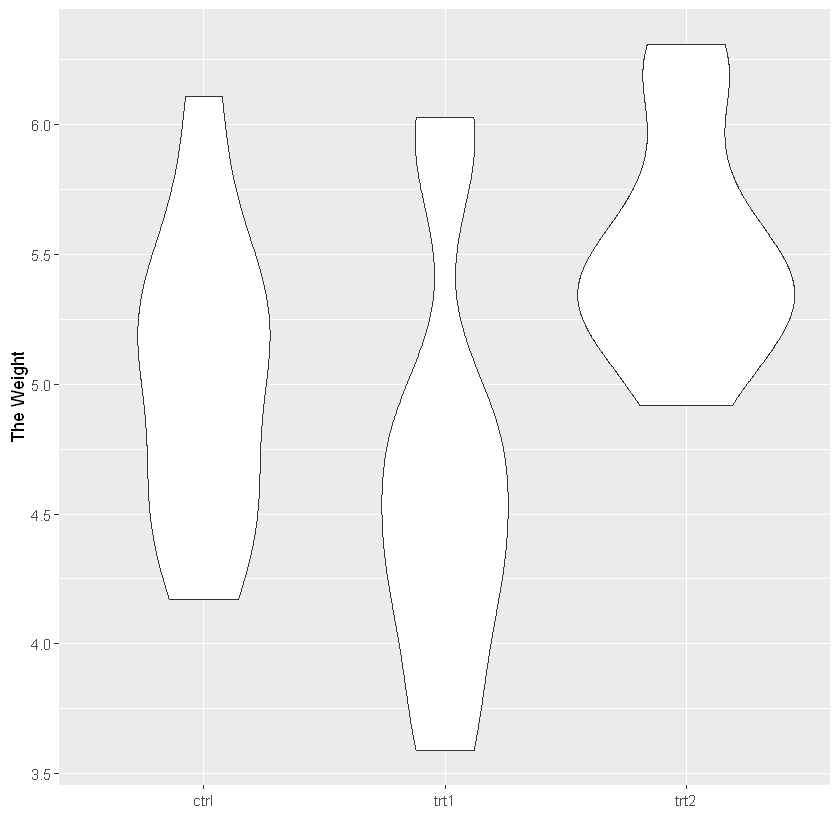

In [69]:
ggplot(data=PlantGrowth, aes(group, weight)) + geom_violin() + labs(x="", y="The Weight")

In [70]:
library(help="datasets")

In [71]:
levels(as.factor(ChickWeight$Diet))

[1] "1" "2" "3" "4"

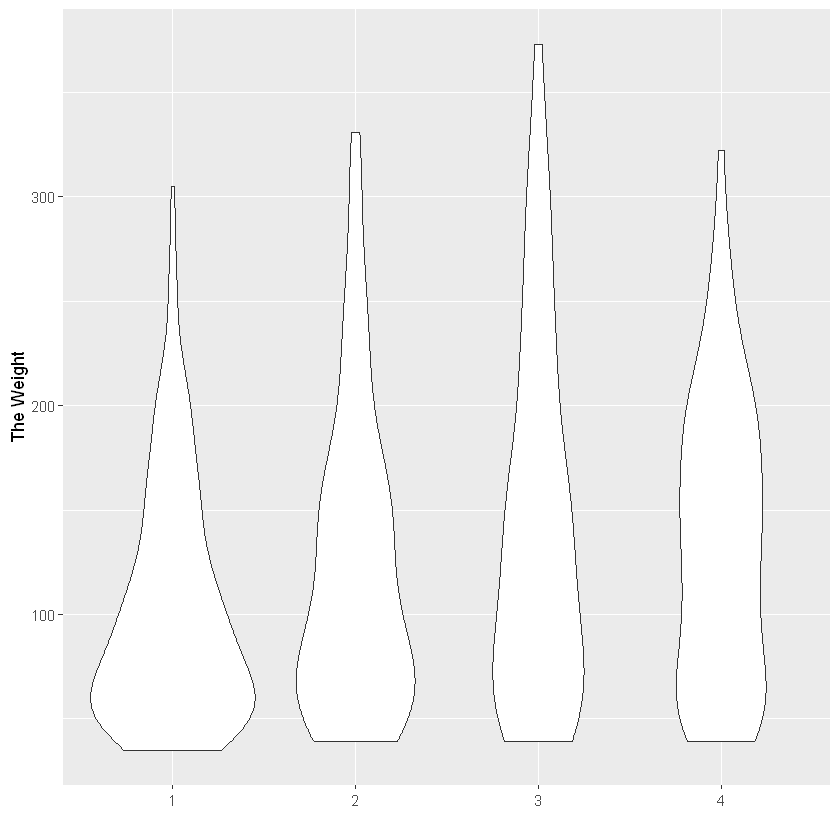

In [72]:
ggplot(data=ChickWeight, aes(Diet, weight)) + geom_violin() + labs(x="", y="The Weight")

In [73]:
length(sleep$extra)

[1] 20

In [74]:
length(CO2$uptake)

[1] 84

## Streudiagramme

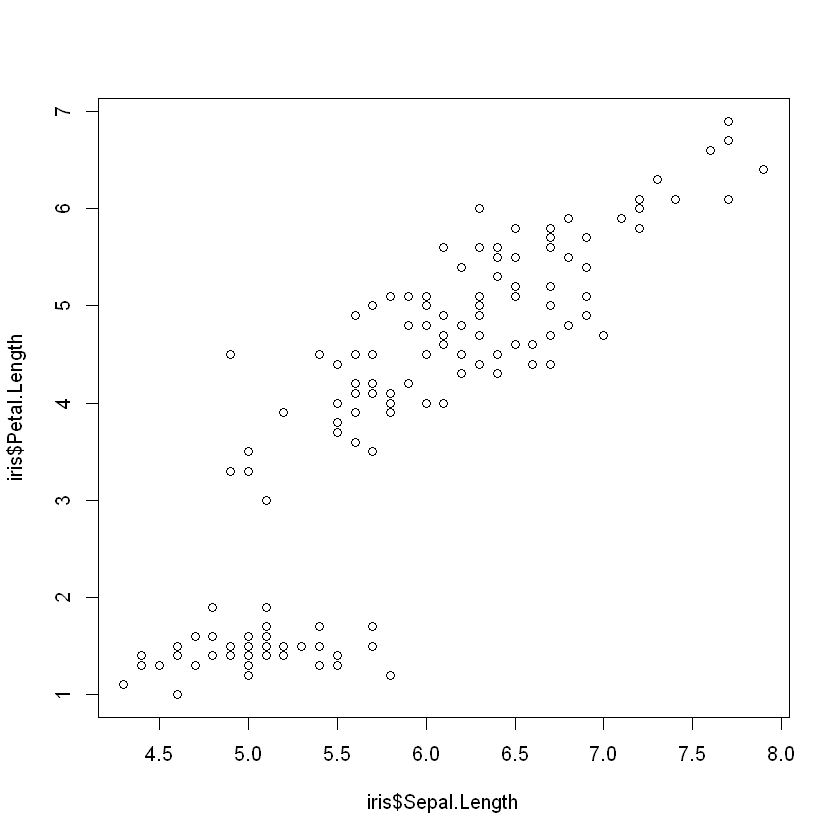

In [75]:
plot(iris$Sepal.Length, iris$Petal.Length)

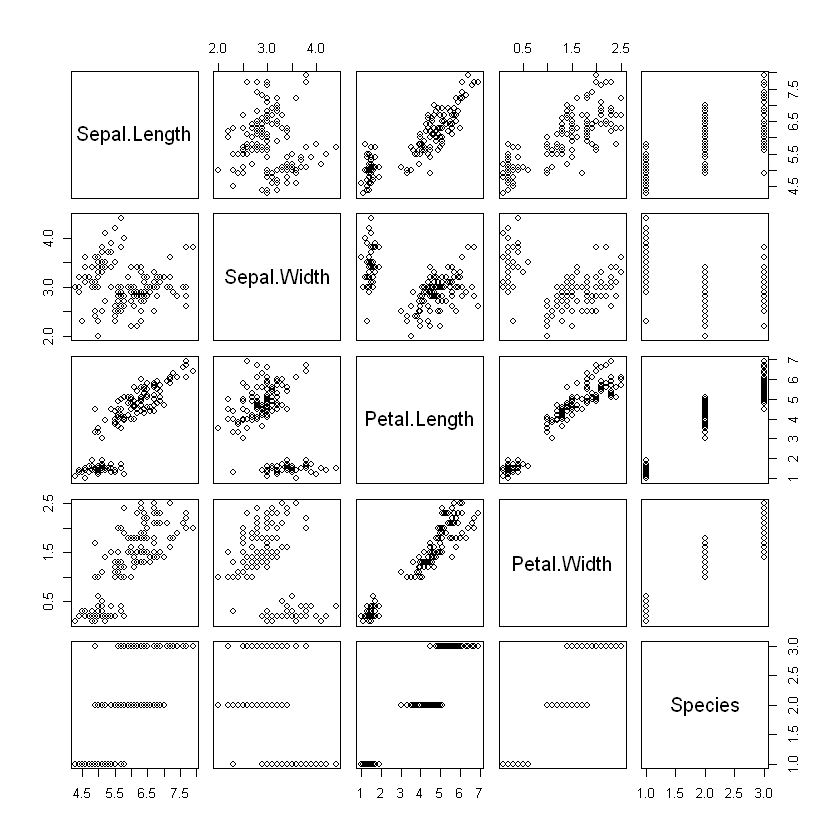

In [76]:
pairs(iris)